## EDA and Visualizations

In [31]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction import text 
import spacy

import warnings
warnings.filterwarnings("ignore")

### Imports

In [32]:
#reading data
subreddits = pd.read_csv('./data/merged_dfs.csv')
chipotle = pd.read_csv('./data/chipotle_raw.csv')
qdoba = pd.read_csv('./data/qdoba_raw.csv')

In [33]:
chipotle.head()

,created_utc,title,self_text,subreddit,sort
0,1.713893e+09,Free BOGO 9/22/24 Hockey Deal,I had seen yesterday that there was a bogo dea...,Chipotle,new
1,1.713893e+09,where did my points go?!?@?@?@,i had roughly 1500 points and when i went to u...,Chipotle,new
2,1.713890e+09,Pepper color…,Sitting here chomping down on my delicious bow...,Chipotle,new
3,1.713889e+09,Here’s why I don’t go to chipotle anymore,$13 with the drink from a small local business...,Chipotle,new
4,1.713888e+09,Fajita veggies,It’s absolutely insane you guys can’t have eno...,Chipotle,new


In [34]:
chipotle.isna().sum().sum()

0

In [35]:
qdoba.head()

,created_utc,title,self_text,subreddit,sort
0,1.713651e+09,Can a qdoba employee please shed some light on...,This is a throwaway account.\n\nSo sometimes l...,qdoba,new
1,1.713560e+09,Found an artery in my birria Qdoba bowl last w...,"Yes, I'm aware that meat comes from animals an...",qdoba,new
2,1.713396e+09,A la carte still available?,I used to always get an a la carte bowl + addi...,qdoba,new
3,1.712707e+09,Elote,Any store start getting the elote ingredients?...,qdoba,new
4,1.712293e+09,in defense of national burrito day,"absolutely joking, it sucks for both customers...",qdoba,new


In [36]:
qdoba.isna().sum().sum()

0

Everything looks like it was imported correctly. So, now let's start exploring the data :)

## Stop Words

In [37]:
#adding additional top words so model cant easily predict subreddits
stopwords_bias = ['qdoba', 'chipotle', 'Chipotle', 'Qdoba', 'CHIPOTLE', 'QDOBA', 'https', 'com', 'imgur', 'http', 'www', 'png', 'pjpg auto webp', 'format pjpg auto', 'pjpg']
default_stopwords = text.ENGLISH_STOP_WORDS

def stopwords_merger(stopwords_bias):
    return list(stopwords_bias) + list(default_stopwords)

## QDOBA EDA

### unigram

In [38]:
#getting function to get the top unigram words
def word_popularizer(df):
    X = df['self_text']
    y = df['subreddit']
    cvec = CountVectorizer(stop_words=stopwords_merger(stopwords_bias), max_features=50, ngram_range=(1, 1))
    X_vect = cvec.fit_transform(X)
    cvec_df = pd.DataFrame(X_vect.toarray(), columns=cvec.get_feature_names_out())
    
    top_words = pd.DataFrame(cvec_df.sum().nlargest(15))
    top_words['word count'] = top_words[0]
    top_words.drop(0, axis=1, inplace=True)
    top_words.sort_values('word count', ascending=True).plot(kind='barh', legend=False, color = 'orange')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title('Top 15 Unigrams in r/qdoba');

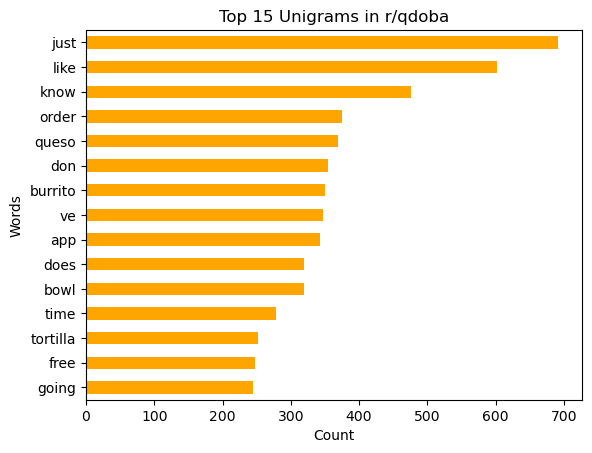

In [39]:
word_popularizer(qdoba)

Qdoba customers mostly use unigram words such as such as `burrito`, `queso`, and `tortilla`. The most popularly used unigram is `just` with 700 occurences.

### bigram

In [40]:
#getting function to get the top bigram words
def biword_popularizer(df):
    X = df['self_text']
    y = df['subreddit']
    cvec = CountVectorizer(stop_words=stopwords_merger(stopwords_bias), max_features=50, ngram_range=(2, 2))
    X_vect = cvec.fit_transform(X)
    cvec_df = pd.DataFrame(X_vect.toarray(), columns=cvec.get_feature_names_out())
    
    top_words = pd.DataFrame(cvec_df.sum().nlargest(15))
    top_words['word count'] = top_words[0]
    top_words.drop(0, axis=1, inplace=True)
    top_words.sort_values('word count', ascending=True).plot(kind='barh', legend=False, color = 'orange')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title('Top 15 Bigrams in r/qdoba');

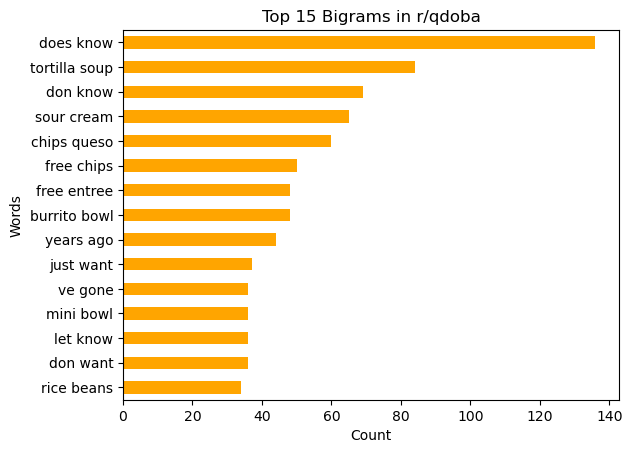

In [41]:
biword_popularizer(qdoba)

Qdoba customers mostly use bigram words such as such as `tortilla soup`, `sour cream`, and `free chips`. The most popularly used bigram is `does know` with 140 occurences. This is most likely due to many customer inquiring about features the company has avaiable such as menu items or promotions. 

### trigram

In [42]:
#getting function to get the top trigram words
def triword_popularizer(df):
    X = df['self_text']
    y = df['subreddit']
    cvec = CountVectorizer(stop_words=stopwords_merger(stopwords_bias), max_features=50, ngram_range=(3, 3))
    X_vect = cvec.fit_transform(X)
    cvec_df = pd.DataFrame(X_vect.toarray(), columns=cvec.get_feature_names_out())
    
    top_words = pd.DataFrame(cvec_df.sum().nlargest(15))
    top_words['word count'] = top_words[0]
    top_words.drop(0, axis=1, inplace=True)
    top_words.sort_values('word count', ascending=True).plot(kind='barh', legend=False, color = 'orange')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title('Top 15 Trigrams in r/qdoba');

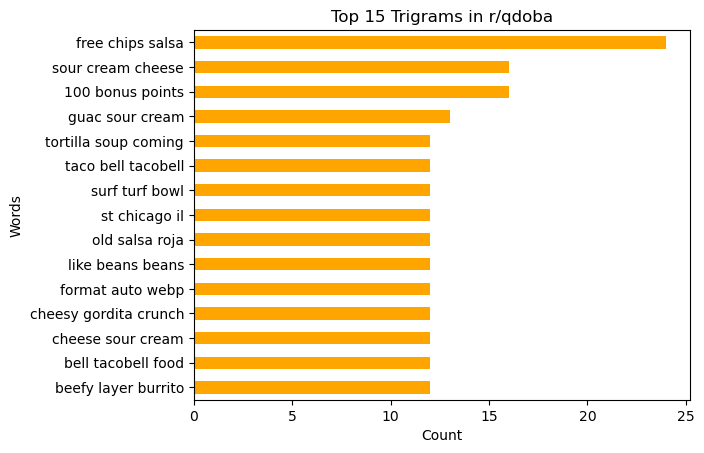

In [43]:
triword_popularizer(qdoba)

Qdoba customers mostly use trigram words such as such as `100 bonus points`, `old salsa roja`, and `tacobell`. The most popularly used trigram is `free chips salsa` with 25 occurences.

## CHIPOTLE EDA 

### unigram

In [44]:
def word_popularizer(df):
    X = df['self_text']
    y = df['subreddit']
    cvec = CountVectorizer(stop_words=stopwords_merger(stopwords_bias), max_features=50, ngram_range=(1, 1))
    X_vect = cvec.fit_transform(X)
    cvec_df = pd.DataFrame(X_vect.toarray(), columns=cvec.get_feature_names_out())
    
    top_words = pd.DataFrame(cvec_df.sum().nlargest(15))
    top_words['word count'] = top_words[0]
    top_words.drop(0, axis=1, inplace=True)
    top_words.sort_values('word count', ascending=True).plot(kind='barh', legend=False, color = 'brown')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title('Top 15 Unigrams in r/Chipotle');

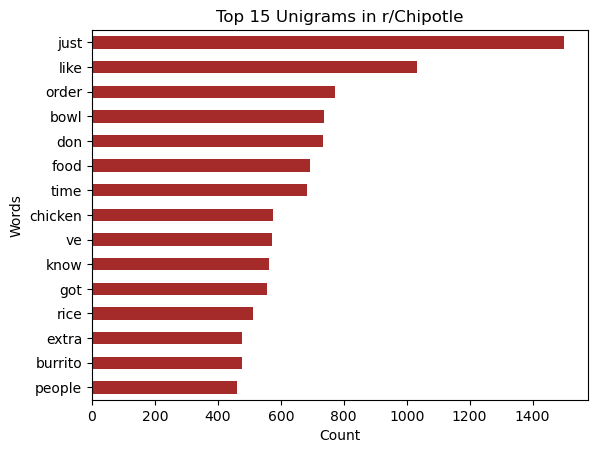

In [45]:
word_popularizer(chipotle)

Chipotle customers mostly use unigram words such as such as `bowl`, `chicken`, and `extra`. The most popularly used unigram is `just` with over 1400 occurences.

### bigram

In [46]:
def biword_popularizer(df):
    X = df['self_text']
    y = df['subreddit']
    cvec = CountVectorizer(stop_words=stopwords_merger(stopwords_bias), max_features=50, ngram_range=(2, 2))
    X_vect = cvec.fit_transform(X)
    cvec_df = pd.DataFrame(X_vect.toarray(), columns=cvec.get_feature_names_out())
    
    top_words = pd.DataFrame(cvec_df.sum().nlargest(15))
    top_words['word count'] = top_words[0]
    top_words.drop(0, axis=1, inplace=True)
    top_words.sort_values('word count', ascending=True).plot(kind='barh', legend=False, color = 'brown')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title('Top 15 Bigrams in r/Chipotle');

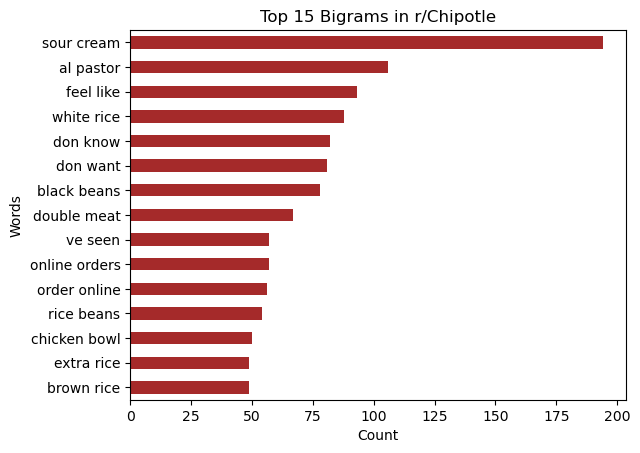

In [47]:
biword_popularizer(chipotle)

Chipotle customers mostly use bigram words such as such as `al pastor`, `black beans`, and `double meat`. The most popularly used bigram is `sour cream` with over ~200 occurences.

### trigram

In [48]:
def triword_popularizer(df):
    X = df['self_text']
    y = df['subreddit']
    cvec = CountVectorizer(stop_words=stopwords_merger(stopwords_bias), max_features=50, ngram_range=(3, 3))
    X_vect = cvec.fit_transform(X)
    cvec_df = pd.DataFrame(X_vect.toarray(), columns=cvec.get_feature_names_out())
    
    top_words = pd.DataFrame(cvec_df.sum().nlargest(15))
    top_words['word count'] = top_words[0]
    top_words.drop(0, axis=1, inplace=True)
    top_words.sort_values('word count', ascending=True).plot(kind='barh', legend=False, color = 'brown')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title('Top 15 Trigrams in r/Chipotle');

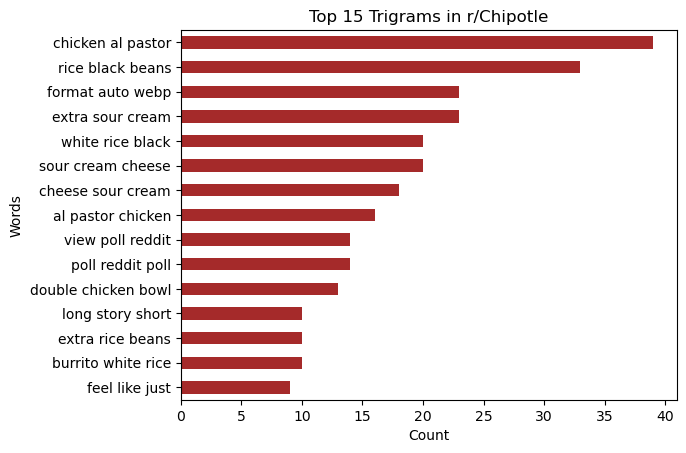

In [49]:
triword_popularizer(chipotle)

Chipotle customers mostly use trigram words such as such as `extra sour cream`, `rice black beans`, and `burrito white rice`. The most popularly used trigram is `chicken al pastor` with over ~40 occurences.